In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})
%matplotlib inline

In [2]:
df= pd.read_csv('T1.csv')

In [3]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


EDA

In [4]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [5]:
np.corrcoef(df["LV ActivePower (kW)"].values,df["Wind Speed (m/s)"].values)[[0],[1]][0]

0.9127742911275553

In [6]:
np.corrcoef(df["LV ActivePower (kW)"].values,df["Theoretical_Power_Curve (KWh)"].values)[[0],[1]][0]

0.9499178485832086

In [7]:
np.corrcoef(df["LV ActivePower (kW)"].values,df["Wind Direction (°)"].values)[[0],[1]][0]

-0.0627017262406926

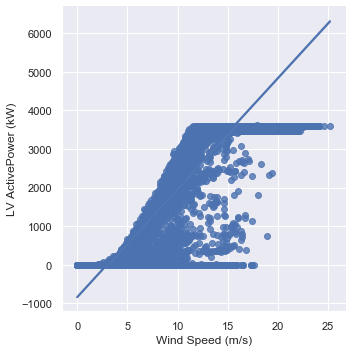

In [8]:
sns.lmplot(y="LV ActivePower (kW)",x="Wind Speed (m/s)",data=df,palette="rainbow")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


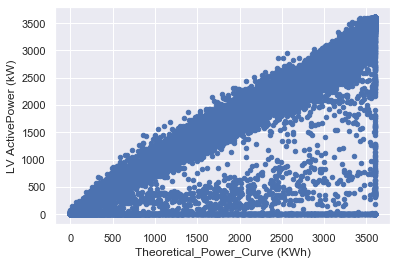

In [9]:
df.plot.scatter(y="LV ActivePower (kW)",x="Theoretical_Power_Curve (KWh)")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


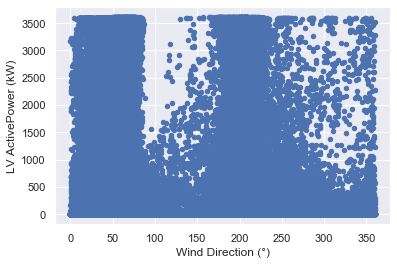

In [10]:
df.plot.scatter(y="LV ActivePower (kW)",x="Wind Direction (°)")

In [11]:
df["Date/Time"]=pd.to_datetime(df["Date/Time"])
df=df.set_index("Date/Time")

In [12]:
df["Year"]=df.index.year
df["Month"]=df.index.month
df["Weekday"]=df.index.weekday

In [13]:
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Weekday
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,0
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,0
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,0


In [14]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Weekday
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.0,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559,2018.0,6.565110,2.970968
std,1312.459242,4.227166,1368.018238,93.443736,0.0,3.395372,1.996080
min,-2.471405,0.000000,0.000000,0.000000,2018.0,1.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437,2018.0,4.000000,1.000000
50%,825.838074,7.104594,1063.776283,73.712978,2018.0,7.000000,3.000000
75%,2482.507568,10.300020,2964.972462,201.696720,2018.0,10.000000,5.000000
max,3618.732910,25.206011,3600.000000,359.997589,2018.0,12.000000,6.000000


In [15]:
df.loc["2018-01"].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Weekday
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.0,3695.0,3695.000000
mean,1469.538834,9.407847,2051.432742,137.723051,2018.0,1.0,2.746414
std,1469.523716,4.550917,1393.675519,93.609463,0.0,0.0,1.956303
min,-0.515600,0.000000,0.000000,0.000000,2018.0,1.0,0.000000
25%,0.000000,6.174557,684.476006,47.090954,2018.0,1.0,1.000000
50%,930.772888,9.049827,2176.160557,157.044403,2018.0,1.0,3.000000
75%,3319.001465,12.729290,3592.308286,205.924248,2018.0,1.0,4.000000
max,3604.583008,22.497311,3600.000000,359.905914,2018.0,1.0,6.000000


Time Series Analysis

Text(0.5, 1.0, 'Time Series Analysis')

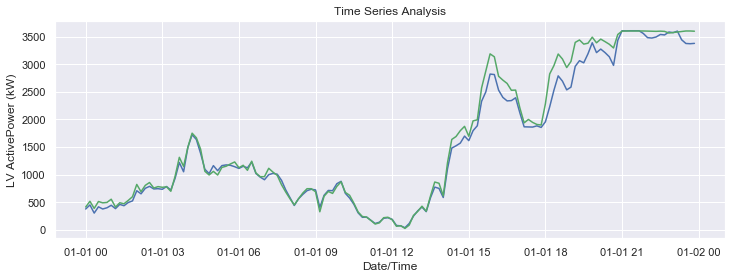

In [16]:
fig, axes = plt.subplots(figsize=(12,4))
x=df.loc["2018-01-01"].index
y=df.loc["2018-01-01"]["LV ActivePower (kW)"].values
z=df.loc["2018-01-01"]["Theoretical_Power_Curve (KWh)"].values
axes.plot(x, y, 'b')
axes.plot(x,z,'g')
axes.set_ylabel('LV ActivePower (kW)')
axes.set_xlabel('Date/Time')
axes.set_title('Time Series Analysis')

PCA

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(scaled_data)
n_pca=pca.transform(scaled_data)

In [19]:
pca.components_

array([[ 5.72448834e-01,  5.72651696e-01,  5.80404515e-01,
        -7.25588683e-02,  2.71050543e-20, -4.32385197e-02,
        -1.91991814e-02],
       [-2.16921044e-02,  2.40786893e-02, -5.47077177e-03,
         5.28287993e-01,  4.77395901e-15, -7.71538006e-01,
        -3.52931496e-01],
       [ 4.46673162e-02,  2.89332559e-02,  2.15354535e-02,
         5.39777191e-01,  3.44169138e-15, -1.50265958e-02,
         8.39713467e-01],
       [ 7.34201154e-02,  2.19276408e-02,  2.08051668e-02,
         6.50795306e-01, -7.77156117e-16,  6.32647311e-01,
        -4.12211911e-01]])

In [20]:
df_comp=pd.DataFrame(pca.components_,columns=df.columns)

In [21]:
df_comp

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Weekday
0,0.572449,0.572652,0.580405,-0.072559,2.710505e-20,-0.043239,-0.019199
1,-0.021692,0.024079,-0.005471,0.528288,4.773959e-15,-0.771538,-0.352931
2,0.044667,0.028933,0.021535,0.539777,3.441691e-15,-0.015027,0.839713
3,0.073420,0.021928,0.020805,0.650795,-7.771561e-16,0.632647,-0.412212


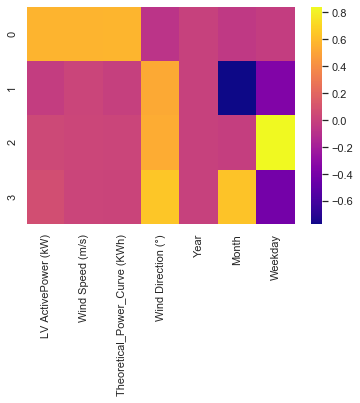

In [22]:
sns.heatmap(df_comp,cmap="plasma")

In [23]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Weekday
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.0,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559,2018.0,6.565110,2.970968
std,1312.459242,4.227166,1368.018238,93.443736,0.0,3.395372,1.996080
min,-2.471405,0.000000,0.000000,0.000000,2018.0,1.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437,2018.0,4.000000,1.000000
50%,825.838074,7.104594,1063.776283,73.712978,2018.0,7.000000,3.000000
75%,2482.507568,10.300020,2964.972462,201.696720,2018.0,10.000000,5.000000
max,3618.732910,25.206011,3600.000000,359.997589,2018.0,12.000000,6.000000
